## Lab | Customer Analysis Round 4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the marketing_customer_analysis.csv file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the files_for_lab folder.

Get the data
Use the jupyter file from the last lab (Customer Analysis Round 3)

Complete the following task
Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
Do the distributions for different numerical variables look like a normal distribution
For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data_cleaning_functions as mylib
import scipy.stats as stats
from scipy.stats import skew, kurtosis

In [207]:
raw_data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
raw_data.shape

(9134, 24)

In [208]:
raw_data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [209]:
raw_data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [210]:
raw_data = mylib.clean_column_names(raw_data)
raw_data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [211]:
num_data = raw_data.select_dtypes(include = np.number)
num_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [212]:
cat_data = raw_data.select_dtypes(include = object)
cat_data.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


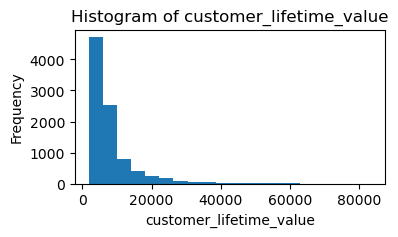

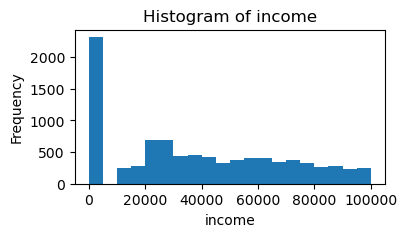

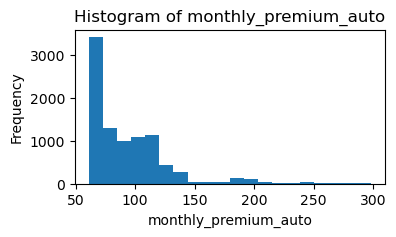

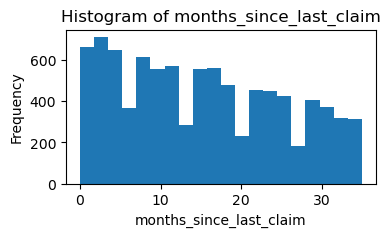

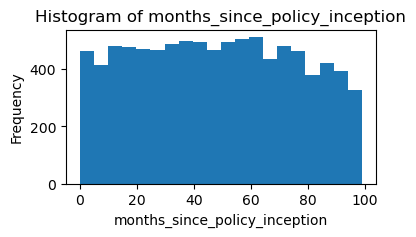

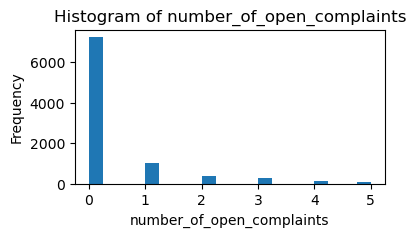

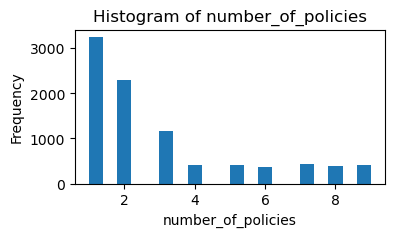

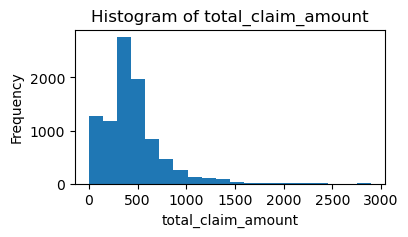

In [213]:
# Plot a histogram to visualize the distribution of the numerical variables
for col in num_data:
    plt.figure(figsize=(4, 2))
    plt.hist(num_data[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

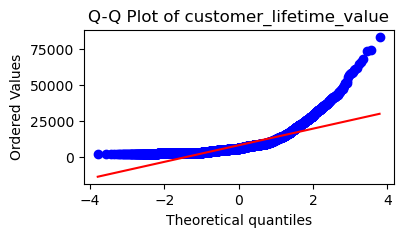

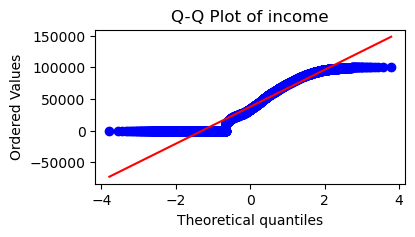

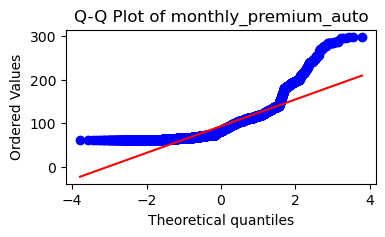

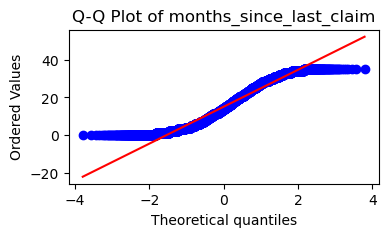

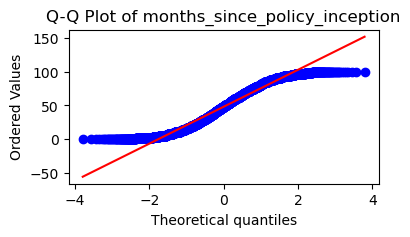

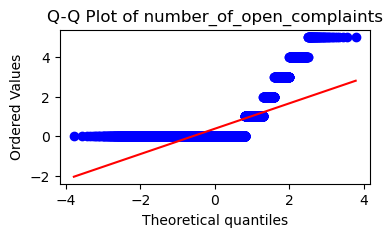

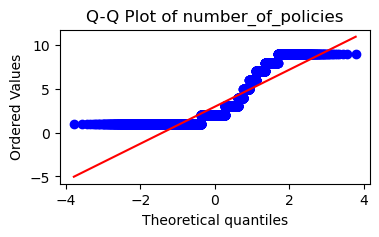

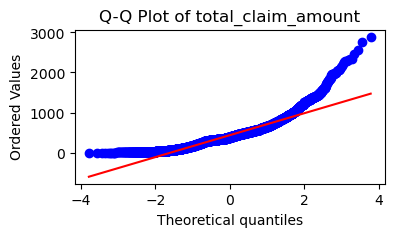

In [214]:
# Plot a Q-Q plot to compare the quantiles of the data with a theoretical normal distribution
for col in num_data:
    plt.figure(figsize=(4, 2))
    stats.probplot(num_data[col], plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    plt.show()

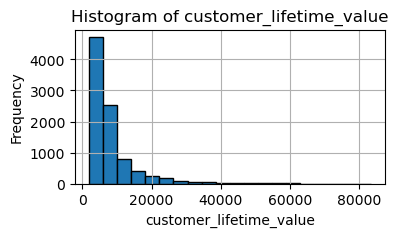

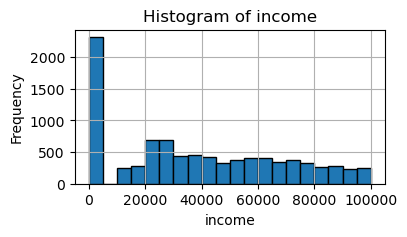

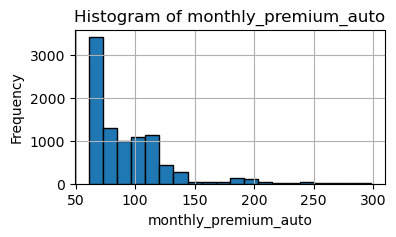

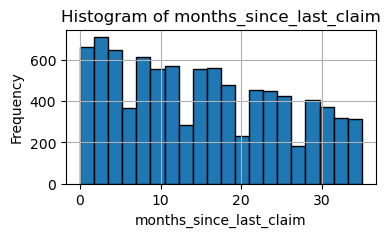

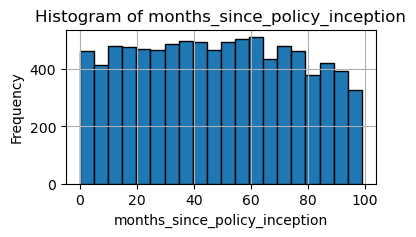

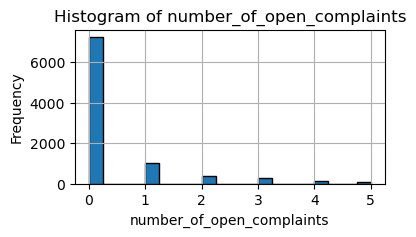

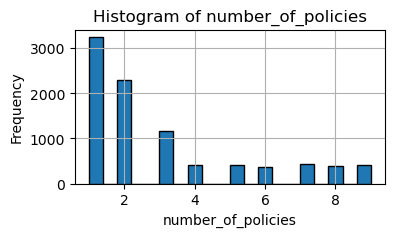

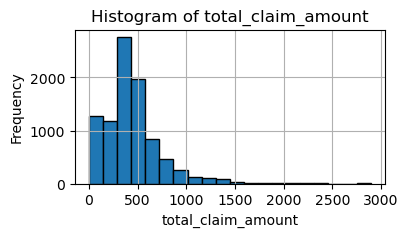

In [215]:
for col in num_data:
    plt.figure(figsize=(4, 2))
    plt.hist(num_data[col], bins=20, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [216]:
# Calculate skewness and kurtosis for each numerical column
for col in num_data:
    col_skewness = skew(num_data[col])
    col_kurtosis = kurtosis(num_data[col])
    print(f'{col} - Skewness: {col_skewness:.2f}, Kurtosis: {col_kurtosis:.2f}')

customer_lifetime_value - Skewness: 3.03, Kurtosis: 13.82
income - Skewness: 0.29, Kurtosis: -1.09
monthly_premium_auto - Skewness: 2.12, Kurtosis: 6.19
months_since_last_claim - Skewness: 0.28, Kurtosis: -1.07
months_since_policy_inception - Skewness: 0.04, Kurtosis: -1.13
number_of_open_complaints - Skewness: 2.78, Kurtosis: 7.74
number_of_policies - Skewness: 1.25, Kurtosis: 0.36
total_claim_amount - Skewness: 1.71, Kurtosis: 5.98


In [217]:
# A normal distribution has skewness close to 0 and kurtosis close to 3.

In [218]:
from scipy.stats import shapiro
for col in num_data:
    # Perform the Shapiro-Wilk test
    statistic, p_value = shapiro(num_data[col])

    # Check if the data follows a normal distribution
    if p_value > 0.05:
        print(f"{col} follows a normal distribution.")
    else:
        print(f"{col} does not follow a normal distribution.")

customer_lifetime_value does not follow a normal distribution.
income does not follow a normal distribution.
monthly_premium_auto does not follow a normal distribution.
months_since_last_claim does not follow a normal distribution.
months_since_policy_inception does not follow a normal distribution.
number_of_open_complaints does not follow a normal distribution.
number_of_policies does not follow a normal distribution.
total_claim_amount does not follow a normal distribution.


/Users/lilitdavidyan/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [219]:
from scipy.stats import anderson

for col in num_data:
    # Perform the Anderson-Darling test
    result = anderson(num_data[col])

    # Check if the data follows a normal distribution
    if result.statistic < result.critical_values[2]:
        print(f"{col} follows a normal distribution.")
    else:
        print(f"{col} does not follow a normal distribution.")


customer_lifetime_value does not follow a normal distribution.
income does not follow a normal distribution.
monthly_premium_auto does not follow a normal distribution.
months_since_last_claim does not follow a normal distribution.
months_since_policy_inception does not follow a normal distribution.
number_of_open_complaints does not follow a normal distribution.
number_of_policies does not follow a normal distribution.
total_claim_amount does not follow a normal distribution.


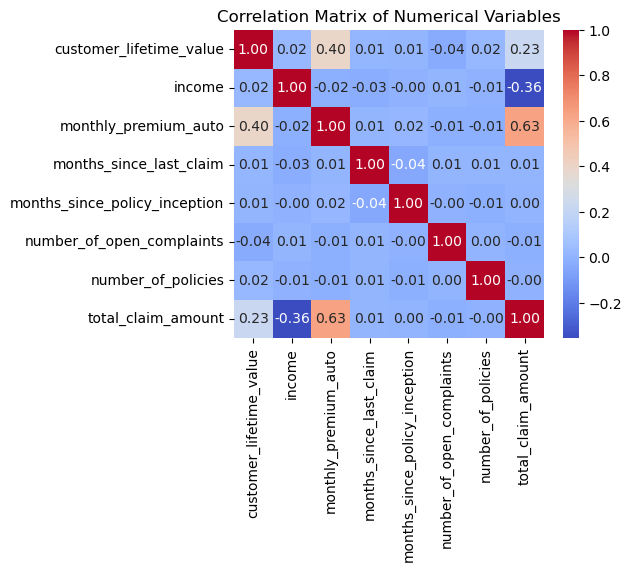

In [220]:
# Calculate the correlation matrix
correlation_matrix = num_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

In [305]:
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


The 'customer_lifetime_value', 'monthly_premium_auto', and 'total_claim_amount' have the highest positive correlation coefficients with the target variable. This suggests that these features have a relatively strong positive linear relationship with the target variable, indicating that as these features increase, the 'total_claim_amount' tends to increase as well.

The 'income' feature has a negative correlation coefficient with the 'total_claim_amount', indicating an inverse relationship. This means that as the 'income' increases, the 'total_claim_amount' tends to decrease.

The 'number_of_open_complaints' and 'number_of_policies' have relatively weak correlations with the 'total_claim_amount' (close to zero), suggesting that they may not have a strong linear relationship with the target variable.

Other features such as 'months_since_last_claim', 'months_since_policy_inception', and 'number_of_policies' have moderate correlations with the 'total_claim_amount'.

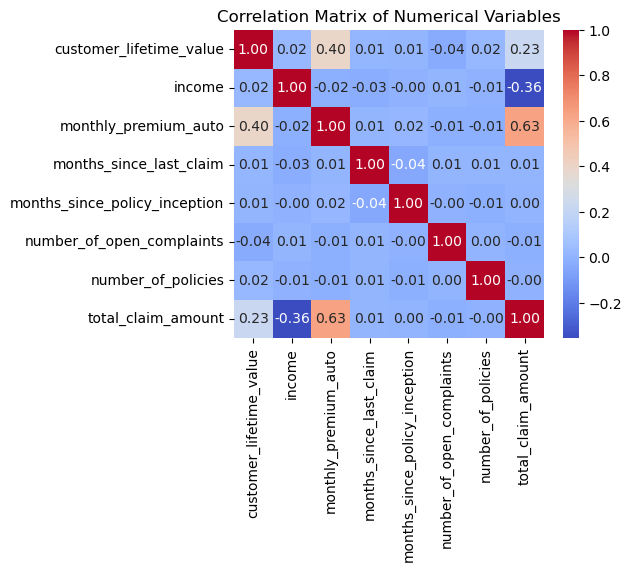

In [221]:
#There are no highly correlated features. Copying the code here for future reference. 

# Find pairs of features with correlation greater than 0.9
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            if feature_i not in highly_correlated_features:
                highly_correlated_features.add(feature_j)
# Drop one of the highly correlated features from each pair
df_no_multicollinearity = num_data.drop(columns=highly_correlated_features)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

### End of Lab 4

## Lab 5 | Customer Analysis Round 5

X-y split.

Normalize (numerical).

In [222]:
X = num_data.drop('total_claim_amount', axis=1)  # Features (all columns except 'total_claim_amount')
y = num_data['total_claim_amount']  # Target variable ('total_claim_amount')

In [223]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [224]:
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

In [225]:
# np.log10(-1)

In [226]:
# transformer = MinMaxScaler().fit(X_num)
# x_normalized = transformer.transform(X_num)
# print(x_normalized.shape)
# x_normalized
# pd.DataFrame(x_normalized, columns=X_num.columns)

In [227]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(X)
print(x_normalized.shape)
X = pd.DataFrame(x_normalized, columns=X.columns)
X.head()

(9134, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


In [228]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
monthly_premium_auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
months_since_policy_inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0


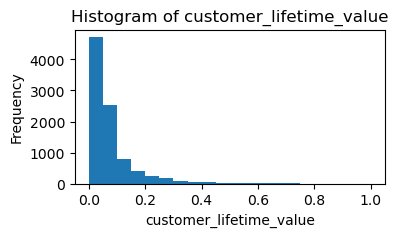

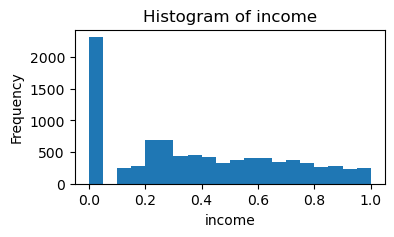

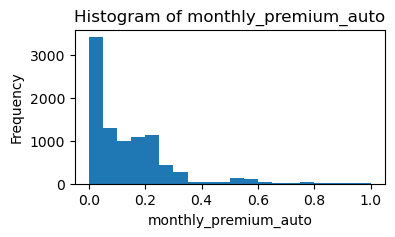

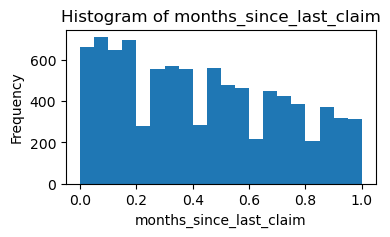

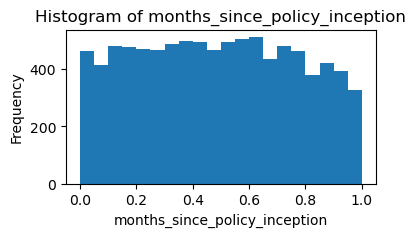

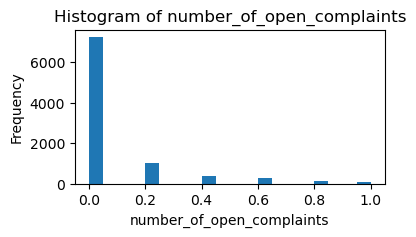

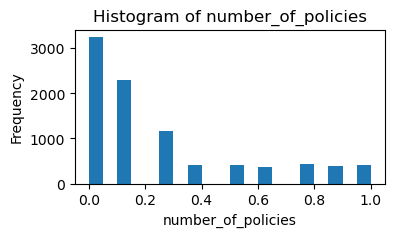

In [229]:
# Plot a histogram to visualize the distribution of the numerical variables
for col in X:
    plt.figure(figsize=(4, 2))
    plt.hist(X[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Lab | Customer Analysis Round 6

One Hot/Label Encoding (categorical).
Concat DataFrames

### Linear Regression
    Train-test split.
    Apply linear regression.

### Model Validation
    Description:
    R2.
    MSE.
    RMSE.
    MAE.

In [230]:
# As a first step I would like to go back and trim the outliers. We'll compare the models afterwards with Val.

In [231]:
# Going one step back before doing the normalisation.

In [232]:
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


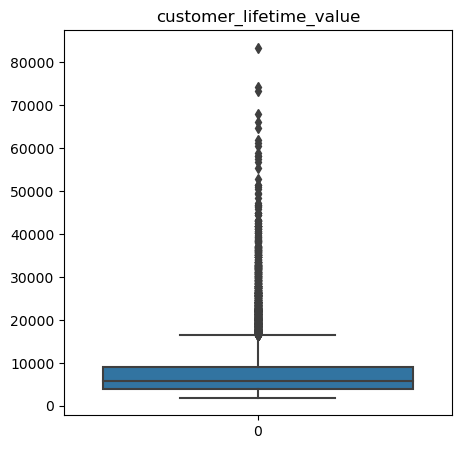

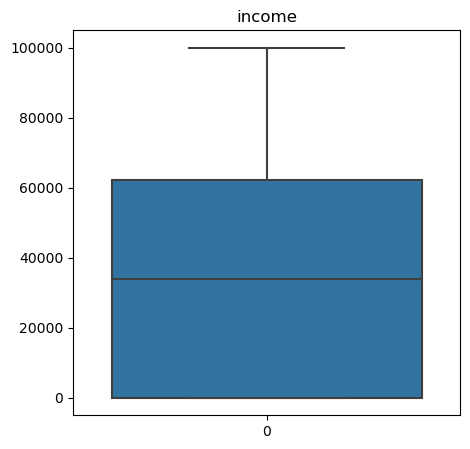

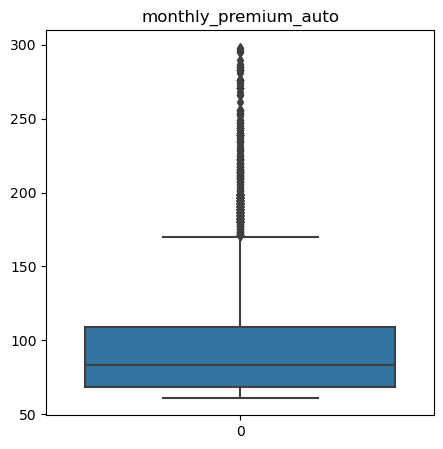

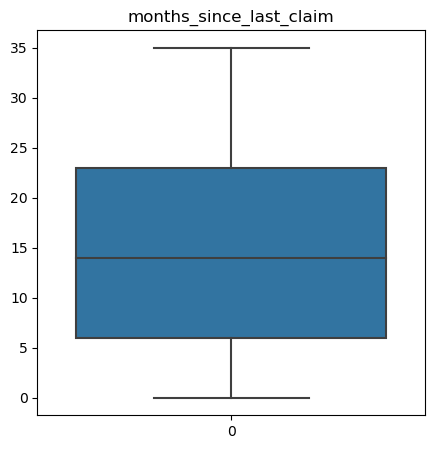

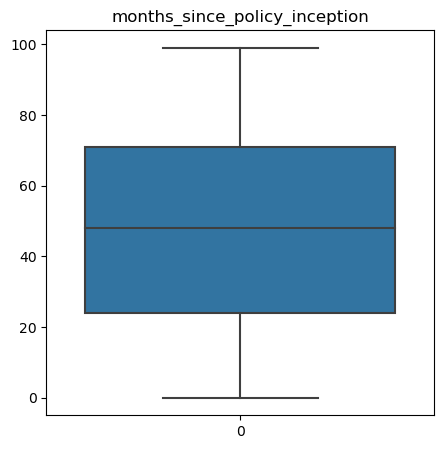

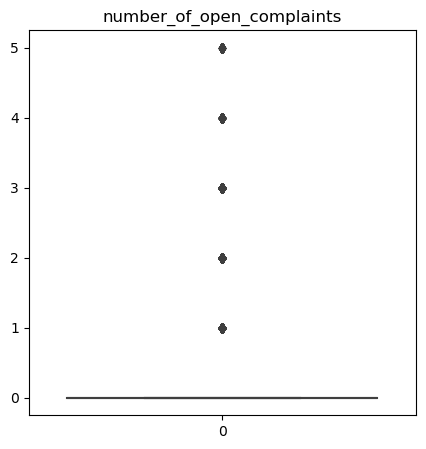

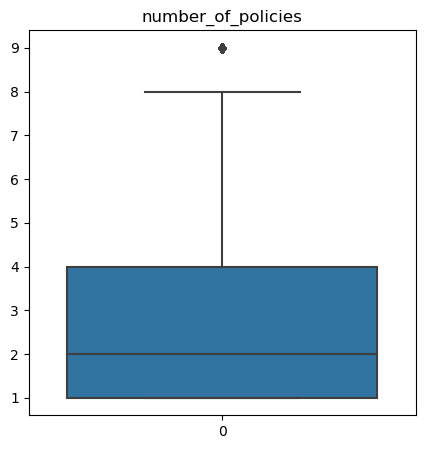

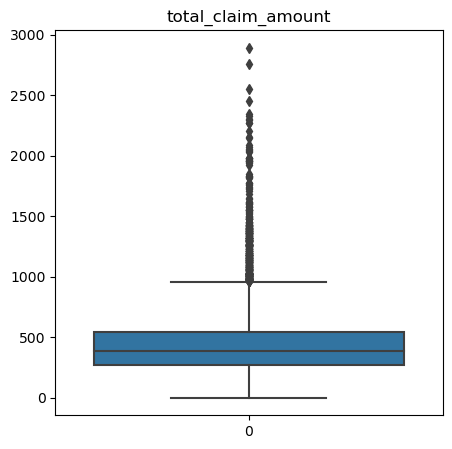

In [233]:
for col in num_data:
    plt.figure(figsize=(5, 5))
    sns.boxplot(num_data[col])
    plt.title(col)
    plt.show()

In [234]:
def trim_tails(data, factor=1.5, columns=None):
    # If columns are not specified or empty, trim all numeric columns
    if columns is None or len(columns) == 0:
        columns = data.select_dtypes(include=[np.number]).columns.tolist()

    # Calculate the lower and upper bounds for each specified column based on IQR
    for col in columns:
        lower_bound = data[col].quantile(0.25) - factor * (data[col].quantile(0.75) - data[col].quantile(0.25))
        upper_bound = data[col].quantile(0.75) + factor * (data[col].quantile(0.75) - data[col].quantile(0.25))
        
        # Remove rows with outliers in the specified column
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

        print(f'Removing raws with outliers for {col} from {lower_bound} to {upper_bound}')

    return data


In [235]:
raw_data.shape

(9134, 24)

In [236]:
columns = ['customer_lifetime_value','monthly_premium_auto', 'total_claim_amount']
trimmed_data_all = trim_tails(raw_data, 1.5, columns)
trimmed_data_all.shape

Removing raws with outliers for customer_lifetime_value from -3457.6210762500014 to 16414.039911750002
Removing raws with outliers for monthly_premium_auto from 9.5 to 165.5
Removing raws with outliers for total_claim_amount from -135.13689437500005 to 923.7096106250001


(7789, 24)

In [237]:
trimmed_data_all.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,7789.0,6082.742116,3115.799233,1898.007675,3614.078436,5332.615013,8005.964669,16407.664610
income,7789.0,38576.873411,30335.191073,0.000000,12160.000000,35011.000000,62902.000000,99981.000000
monthly_premium_auto,7789.0,85.863525,21.702386,61.000000,68.000000,78.000000,103.000000,165.000000
months_since_last_claim,7789.0,14.998074,10.017197,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,7789.0,47.989601,27.866275,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,7789.0,0.390037,0.923156,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,7789.0,3.044678,2.466375,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,7789.0,379.176161,200.232910,0.099007,253.183568,355.200000,513.600000,922.335972


In [238]:
trimmed_data_all.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize


In [255]:
num_data = trimmed_data_all.select_dtypes(include = np.number)
cat_data = trimmed_data_all.select_dtypes(include = object)

X = num_data.drop('total_claim_amount', axis=1)  # Features (all columns except 'total_claim_amount')
y = num_data['total_claim_amount']  # Target variable ('total_claim_amount')

In [256]:
scaler = MinMaxScaler()
original_index = X.index
# print(original_index) 
x_normalized = scaler.fit_transform(X)
print(x_normalized.shape)
X = pd.DataFrame(x_normalized, columns=X.columns)

X.index = original_index
X.head()

Int64Index([   0,    2,    3,    4,    5,    6,    7,    9,   10,   11,
            ...
            9121, 9123, 9124, 9126, 9127, 9128, 9130, 9131, 9132, 9133],
           dtype='int64', length=7789)
(7789, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.059651,0.562847,0.076923,0.914286,0.050505,0.0,0.000
2,0.757387,0.487763,0.451923,0.514286,0.383838,0.0,0.125
3,0.396140,0.000000,0.432692,0.514286,0.656566,0.0,0.750
4,0.063109,0.438443,0.115385,0.342857,0.444444,0.0,0.000
5,0.438211,0.629140,0.076923,0.400000,0.949495,0.0,0.125


In [253]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,7789.0,0.288410,0.214740,0.0,0.118271,0.236712,0.420958,1.0
income,7789.0,0.385842,0.303410,0.0,0.121623,0.350177,0.629140,1.0
monthly_premium_auto,7789.0,0.239072,0.208677,0.0,0.067308,0.163462,0.403846,1.0
months_since_last_claim,7789.0,0.428516,0.286206,0.0,0.171429,0.400000,0.657143,1.0
months_since_policy_inception,7789.0,0.484743,0.281478,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,7789.0,0.078007,0.184631,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,7789.0,0.255585,0.308297,0.0,0.000000,0.125000,0.375000,1.0


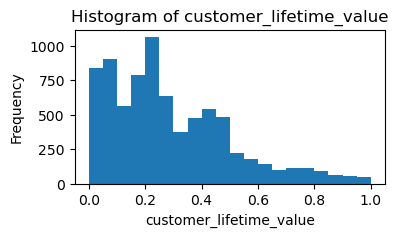

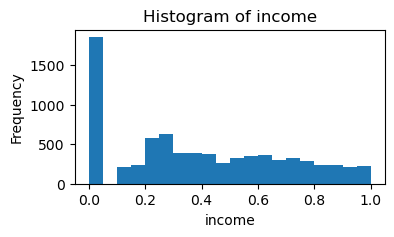

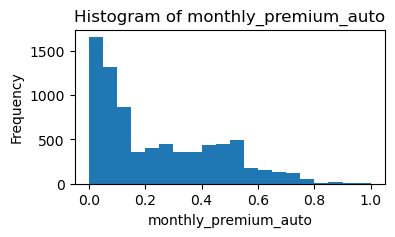

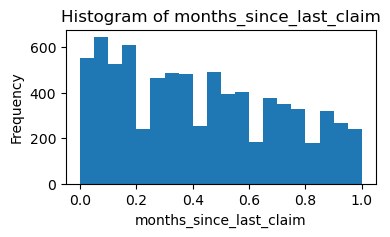

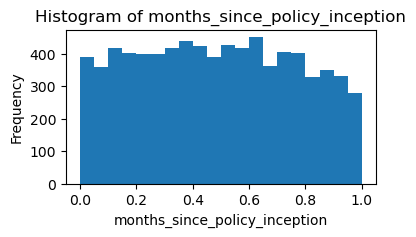

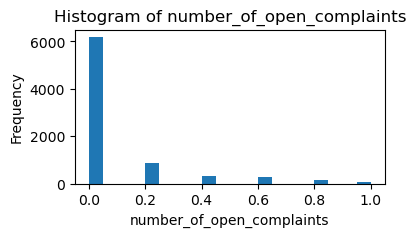

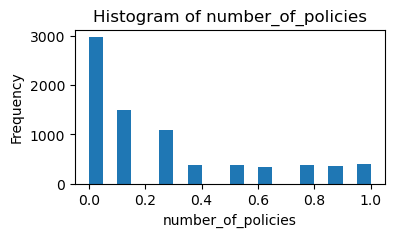

In [257]:
# Plot a histogram to visualize the distribution of the numerical variables after trimming the tails
for col in X:
    plt.figure(figsize=(4, 2))
    plt.hist(X[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [258]:
def one_hot_encode_categorical(data, columns=None):
    # If columns are not specified or empty, one-hot encode all categorical columns
    if columns is None or len(columns) == 0:
        columns = data.select_dtypes(include=['object']).columns.tolist()

    # Perform One Hot Encoding using Pandas get_dummies function
    encoded_data = pd.get_dummies(data, columns=columns, drop_first=True)

    return encoded_data

In [259]:
cat_data.describe().T

,count,unique,top,freq
customer,7789,7789,BU79786,1
state,7789,5,California,2675
response,7789,2,No,6649
coverage,7789,3,Basic,4923
education,7789,5,Bachelor,2335
effective_to_date,7789,59,1/10/11,171
employmentstatus,7789,5,Employed,4957
gender,7789,2,F,3983
location_code,7789,3,Suburban,4804
marital_status,7789,3,Married,4615


In [260]:
# cat_data = cat_data.drop(['customer', 'effective_to_date'], axis = 1)
# cat_data.describe().T

In [261]:
columns_to_encode = ['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender',
                     'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type',
                     'sales_channel', 'vehicle_class', 'vehicle_size']


In [247]:
# encoded_data = one_hot_encode_categorical(cat_data)
# encoded_data.head()

In [262]:
encoded_data = pd.get_dummies(cat_data, columns=columns_to_encode, drop_first=True)


In [263]:
encoded_data.shape

(7789, 43)

In [264]:
encoded_data

,customer,effective_to_date,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,BU79786,2/24/11,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,AI49188,2/19/11,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,WW63253,1/20/11,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,HB64268,2/3/11,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,OC83172,1/25/11,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,1/6/11,1,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
9130,PK87824,2/12/11,1,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
9131,TD14365,2/6/11,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9132,UP19263,2/3/11,1,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0


In [265]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.059651,0.562847,0.076923,0.914286,0.050505,0.0,0.000
2,0.757387,0.487763,0.451923,0.514286,0.383838,0.0,0.125
3,0.396140,0.000000,0.432692,0.514286,0.656566,0.0,0.750
4,0.063109,0.438443,0.115385,0.342857,0.444444,0.0,0.000
5,0.438211,0.629140,0.076923,0.400000,0.949495,0.0,0.125
...,...,...,...,...,...,...,...
9128,0.151788,0.477701,0.413462,0.457143,0.585859,0.0,0.000
9130,0.082600,0.216081,0.173077,0.400000,0.282828,0.0,0.000
9131,0.431842,0.000000,0.230769,0.257143,0.373737,0.6,0.125
9132,0.387772,0.219452,0.336538,0.971429,0.030303,0.0,0.250


In [266]:
cat_data.drop(columns=columns_to_encode)
cat_data.shape

(7789, 16)

In [267]:
X.shape

(7789, 7)

In [268]:
X = pd.concat([X, encoded_data], axis = 1)
X.shape

(7789, 50)

In [283]:
X = X.drop(['customer', 'effective_to_date'], axis = 1)

## Linear Regression

In [284]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [285]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
8478,0.220495,0.672458,0.019231,0.285714,0.262626,0.0,0.250,0,0,1,...,1,0,0,1,0,0,0,1,1,0
1053,0.024152,0.249147,0.019231,0.200000,0.636364,0.2,0.000,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1697,0.098739,0.459527,0.211538,0.571429,0.040404,0.0,0.000,0,0,0,...,1,0,0,1,0,0,0,1,1,0
8561,0.482333,0.262060,0.490385,0.114286,0.484848,0.0,0.875,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3086,0.349899,0.265190,0.288462,0.457143,0.585859,0.0,0.250,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,0.223464,0.269571,0.144231,0.028571,0.000000,0.2,0.875,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6336,0.217020,0.299627,0.038462,0.542857,0.727273,0.0,0.750,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,0.052892,0.522759,0.067308,0.400000,0.989899,0.0,0.000,0,0,0,...,0,0,0,1,0,0,0,1,1,0
8907,0.235495,0.664796,0.048077,0.485714,0.656566,0.0,0.250,1,0,0,...,0,1,0,0,1,0,0,1,1,0


In [286]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
6839,0.114189,0.585681,0.259615,0.114286,0.838384,0.0,0.000,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6968,0.043853,0.216101,0.096154,0.600000,0.222222,0.6,0.000,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1551,0.137634,0.523710,0.394231,0.371429,0.787879,0.0,0.000,0,1,0,...,1,0,0,0,0,0,0,0,1,0
5994,0.054668,0.821236,0.057692,0.485714,0.636364,0.0,0.000,0,1,0,...,0,1,0,0,1,0,0,0,0,1
115,0.371619,0.000000,0.394231,0.314286,0.707071,0.2,0.250,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6048,0.034427,0.000000,0.048077,0.657143,0.010101,0.0,0.000,0,0,1,...,0,0,0,0,1,0,0,0,1,0
7409,0.933699,0.269951,0.038462,0.257143,0.606061,0.2,0.125,1,0,0,...,1,0,0,0,0,0,0,0,1,0
5144,0.305326,0.000000,0.375000,0.485714,0.212121,0.4,0.375,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2961,0.063320,0.660355,0.086538,0.314286,0.949495,0.0,0.000,0,0,1,...,0,0,1,0,0,0,0,1,1,0


In [287]:
y_train

8478    246.693624
1053    347.857619
1697    182.948495
8561    168.901895
3086    655.200000
           ...    
6132    364.800000
6336    312.000000
997     141.922839
8907    294.705573
8524     43.959921
Name: total_claim_amount, Length: 6231, dtype: float64

In [288]:
y_test

6839     55.510526
6968    340.800000
1551    645.952371
5994     52.804096
115     489.600000
           ...    
6048    596.494439
7409    297.864823
5144    648.364172
2961    265.629611
7805    399.056400
Name: total_claim_amount, Length: 1558, dtype: float64

In [289]:
from sklearn.linear_model import LinearRegression

In [290]:
model = LinearRegression()

In [291]:
model.fit(X_train, y_train)

LinearRegression()

In [292]:
y_pred = model.predict(X_test)

In [295]:
y_pred

array([ 75.67371496, 390.74131665, 555.75103403, ..., 624.49826413,
       232.37141099, 440.64032417])

In [302]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 8736.645135644032
R-squared: 0.7840258400747031


In [303]:
# Create a DataFrame to compare y_test and y_pred side by side
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
comparison_df

,Actual,Predicted
6839,55.510526,75.673715
6968,340.800000,390.741317
1551,645.952371,555.751034
5994,52.804096,25.631231
115,489.600000,568.806409
...,...,...
6048,596.494439,478.901009
7409,297.864823,225.001034
5144,648.364172,624.498264
2961,265.629611,232.371411


In [304]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 93.47002265776997
Mean Absolute Error (MAE): 70.74058115102505


In [340]:
# Calculate correlation matrix between features and target variable
correlation_matrix = X.corrwith(y)
print("correlation_matrix: ") 
print(correlation_matrix)

# Get absolute correlation values and sort them in descending order
sorted_correlation = correlation_matrix.abs().sort_values(ascending=False)
print("sorted_correlation:  ") 
print(sorted_correlation)

# Select the top features based on correlation coefficients
num_features_to_select = 40
selected_features = sorted_correlation.head(num_features_to_select).index
print("selected_features:  ") 
print(selected_features)


correlation_matrix: 
customer_lifetime_value           0.149886
income                           -0.380316
monthly_premium_auto              0.433212
months_since_last_claim          -0.018539
months_since_policy_inception    -0.020487
number_of_open_complaints        -0.020519
number_of_policies               -0.009618
state_California                 -0.000994
state_Nevada                      0.000507
state_Oregon                     -0.000048
state_Washington                  0.008791
response_Yes                      0.051022
coverage_Extended                 0.139803
coverage_Premium                  0.160431
education_College                -0.019557
education_Doctor                 -0.058724
education_High School or Below    0.128057
education_Master                 -0.101353
employmentstatus_Employed        -0.368701
employmentstatus_Medical Leave    0.045986
employmentstatus_Retired          0.083115
employmentstatus_Unemployed       0.336530
gender_M                         

In [341]:
# Filter the X dataframe to keep only the selected features
X_selected = X[selected_features]

In [342]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


R2 Score: 0.7842893382816433
Mean Squared Error (MSE): 8725.986034903874
Root Mean Squared Error (RMSE): 93.41298643606184
Mean Absolute Error (MAE): 70.6778454470473
